# Mengimport Data

In [154]:
import pandas as pd

data = pd.read_excel("C:/Users/ACER/Downloads/data bankkk.xlsx")
data_chny = pd.read_csv("C:/Users/ACER/Downloads/Data Historis CNY_IDR (1).csv")

In [155]:
data.head()

,Tanggal,Kurs (USD),Kurs (Yuan),ULN,Minyak,Batubara,CPO,Kopi Robusta,Karet,NPL,LDR,ROA
0,2015-01-01,12625.0,NaN,300508.225476,47.266000,53.9270,638.083810,1.023889,1.803182,2.369347,88.477513,2.815380
1,2015-02-01,12863.0,NaN,300070.301140,50.608947,53.0600,632.131250,1.037368,1.815333,2.456301,88.255119,2.508675
2,2015-03-01,13084.0,NaN,298518.658523,47.783636,53.0600,606.120909,0.981364,1.870000,2.402279,87.583926,2.694376
3,2015-04-01,12937.0,NaN,299954.805787,54.444762,52.9400,593.638636,0.988571,1.894762,2.482560,87.937973,2.530818
4,2015-05-01,13332.0,NaN,302691.669662,59.274500,52.8515,599.990000,0.944500,1.974211,2.584217,88.724484,2.450769


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tanggal       112 non-null    datetime64[ns]
 1   Kurs (USD)    112 non-null    float64       
 2   Kurs (Yuan)   0 non-null      float64       
 3   ULN           112 non-null    float64       
 4   Minyak        112 non-null    float64       
 5   Batubara      112 non-null    float64       
 6   CPO           112 non-null    float64       
 7   Kopi Robusta  112 non-null    float64       
 8   Karet         112 non-null    float64       
 9   NPL           112 non-null    float64       
 10  LDR           112 non-null    float64       
 11  ROA           110 non-null    float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 10.6 KB


In [157]:
data_chny.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,14/08/2024,"2.194,91","2.201,93","2.201,93","2.190,48",NaN,"-0,32%"
1,13/08/2024,"2.201,93","2.224,86","2.224,86","2.196,56",NaN,"-1,03%"
2,12/08/2024,"2.224,86","2.221,90","2.227,70","2.220,18",NaN,"0,18%"
3,09/08/2024,"2.220,80","2.214,42","2.222,76","2.213,36",NaN,"0,31%"
4,08/08/2024,"2.213,83","2.234,00","2.235,69","2.214,91",NaN,"-0,87%"


In [158]:
data_chny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tanggal     2510 non-null   object 
 1   Terakhir    2510 non-null   object 
 2   Pembukaan   2510 non-null   object 
 3   Tertinggi   2510 non-null   object 
 4   Terendah    2510 non-null   object 
 5   Vol.        0 non-null      float64
 6   Perubahan%  2510 non-null   object 
dtypes: float64(1), object(6)
memory usage: 137.4+ KB


# Membersihkan Data

In [160]:
data_chny['Tanggal'] = pd.to_datetime(data_chny['Tanggal'])

In [161]:
def convert_to_float(x):
    return float(x.replace('.', '').replace(',', '.'))

data_chny['Terakhir'] = data_chny['Terakhir'].apply(convert_to_float)
data_chny['Pembukaan'] = data_chny['Pembukaan'].apply(convert_to_float)
data_chny['Tertinggi'] = data_chny['Tertinggi'].apply(convert_to_float)
data_chny['Terendah'] = data_chny['Terendah'].apply(convert_to_float)

In [162]:
data_chny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     2510 non-null   datetime64[ns]
 1   Terakhir    2510 non-null   float64       
 2   Pembukaan   2510 non-null   float64       
 3   Tertinggi   2510 non-null   float64       
 4   Terendah    2510 non-null   float64       
 5   Vol.        0 non-null      float64       
 6   Perubahan%  2510 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 137.4+ KB


In [163]:
data_chny['Mean Kurs'] = data_chny[['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']].mean(axis=1)
data_chny.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,Mean Kurs
0,2024-08-14,2194.91,2201.93,2201.93,2190.48,NaN,"-0,32%",2197.3125
1,2024-08-13,2201.93,2224.86,2224.86,2196.56,NaN,"-1,03%",2212.0525
2,2024-08-12,2224.86,2221.90,2227.70,2220.18,NaN,"0,18%",2223.6600
3,2024-08-09,2220.80,2214.42,2222.76,2213.36,NaN,"0,31%",2217.8350
4,2024-08-08,2213.83,2234.00,2235.69,2214.91,NaN,"-0,87%",2224.6075


In [164]:
# Truncate kolom 'Tanggal' ke awal bulan
data_chny['Tanggal'] = data_chny['Tanggal'].dt.to_period('M').dt.to_timestamp()

In [165]:
data_kurs_china = data_chny.groupby("Tanggal")["Mean Kurs"].mean().reset_index()
data_kurs_china

,Tanggal,Mean Kurs
0,2015-01-01,2020.052386
1,2015-02-01,2039.518625
2,2015-03-01,2092.427500
3,2015-04-01,2086.650000
4,2015-05-01,2115.075238
...,...,...
111,2024-04-01,2215.198636
112,2024-05-01,2221.250000
113,2024-06-01,2251.790500
114,2024-07-01,2237.008804


In [166]:
df = pd.merge(data, data_kurs_china[['Tanggal', 'Mean Kurs']], on='Tanggal', how='inner').drop("Kurs (Yuan)", axis=1).rename(columns={
    'Mean Kurs':'Kurs (Yuan)'
})

df.head()

,Tanggal,Kurs (USD),ULN,Minyak,Batubara,CPO,Kopi Robusta,Karet,NPL,LDR,ROA,Kurs (Yuan)
0,2015-01-01,12625.0,300508.225476,47.266000,53.9270,638.083810,1.023889,1.803182,2.369347,88.477513,2.815380,2020.052386
1,2015-02-01,12863.0,300070.301140,50.608947,53.0600,632.131250,1.037368,1.815333,2.456301,88.255119,2.508675,2039.518625
2,2015-03-01,13084.0,298518.658523,47.783636,53.0600,606.120909,0.981364,1.870000,2.402279,87.583926,2.694376,2092.427500
3,2015-04-01,12937.0,299954.805787,54.444762,52.9400,593.638636,0.988571,1.894762,2.482560,87.937973,2.530818,2086.650000
4,2015-05-01,13332.0,302691.669662,59.274500,52.8515,599.990000,0.944500,1.974211,2.584217,88.724484,2.450769,2115.075238


In [167]:
rentang_waktu = df['Tanggal'] < '2020-12-01'

df.loc[rentang_waktu, "Kopi Robusta"] = df.loc[rentang_waktu, "Kopi Robusta"]*100
df.head()

,Tanggal,Kurs (USD),ULN,Minyak,Batubara,CPO,Kopi Robusta,Karet,NPL,LDR,ROA,Kurs (Yuan)
0,2015-01-01,12625.0,300508.225476,47.266000,53.9270,638.083810,102.388889,1.803182,2.369347,88.477513,2.815380,2020.052386
1,2015-02-01,12863.0,300070.301140,50.608947,53.0600,632.131250,103.736842,1.815333,2.456301,88.255119,2.508675,2039.518625
2,2015-03-01,13084.0,298518.658523,47.783636,53.0600,606.120909,98.136364,1.870000,2.402279,87.583926,2.694376,2092.427500
3,2015-04-01,12937.0,299954.805787,54.444762,52.9400,593.638636,98.857143,1.894762,2.482560,87.937973,2.530818,2086.650000
4,2015-05-01,13332.0,302691.669662,59.274500,52.8515,599.990000,94.450000,1.974211,2.584217,88.724484,2.450769,2115.075238


# Mengevaluasi Data

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tanggal       112 non-null    datetime64[ns]
 1   Kurs (USD)    112 non-null    float64       
 2   ULN           112 non-null    float64       
 3   Minyak        112 non-null    float64       
 4   Batubara      112 non-null    float64       
 5   CPO           112 non-null    float64       
 6   Kopi Robusta  112 non-null    float64       
 7   Karet         112 non-null    float64       
 8   NPL           112 non-null    float64       
 9   LDR           112 non-null    float64       
 10  ROA           110 non-null    float64       
 11  Kurs (Yuan)   112 non-null    float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 10.6 KB


In [170]:
df.isnull().sum()

Tanggal         0
Kurs (USD)      0
ULN             0
Minyak          0
Batubara        0
CPO             0
Kopi Robusta    0
Karet           0
NPL             0
LDR             0
ROA             2
Kurs (Yuan)     0
dtype: int64

In [171]:
df.duplicated().sum()

0

In [172]:
df[df['ROA'].isnull()]

,Tanggal,Kurs (USD),ULN,Minyak,Batubara,CPO,Kopi Robusta,Karet,NPL,LDR,ROA,Kurs (Yuan)
92,2022-09-01,15247.0,394236.210782,83.870952,195.185714,808.229048,107.90,1.788571,2.76,83.224715,NaN,2134.681705
93,2022-10-01,15542.0,389690.079677,87.257143,191.072500,799.685294,94.73,1.696842,2.70,80.935180,NaN,2145.546429


In [173]:
df['ROA'] = df['ROA'].interpolate()

In [174]:
df[df['Tanggal'] == '2022-09-01']

,Tanggal,Kurs (USD),ULN,Minyak,Batubara,CPO,Kopi Robusta,Karet,NPL,LDR,ROA,Kurs (Yuan)
92,2022-09-01,15247.0,394236.210782,83.870952,195.185714,808.229048,107.9,1.788571,2.76,83.224715,2.475978,2134.681705


In [175]:
df[df['Tanggal'] == '2022-10-01']

,Tanggal,Kurs (USD),ULN,Minyak,Batubara,CPO,Kopi Robusta,Karet,NPL,LDR,ROA,Kurs (Yuan)
93,2022-10-01,15542.0,389690.079677,87.257143,191.0725,799.685294,94.73,1.696842,2.7,80.93518,2.472989,2145.546429


In [176]:
df.isnull().sum()

Tanggal         0
Kurs (USD)      0
ULN             0
Minyak          0
Batubara        0
CPO             0
Kopi Robusta    0
Karet           0
NPL             0
LDR             0
ROA             0
Kurs (Yuan)     0
dtype: int64

# Exploratory Data Analysis (EDA)

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [179]:
col = df.drop("Tanggal", axis=1).columns.tolist()
col

['Kurs (USD)',
 'ULN',
 'Minyak',
 'Batubara',
 'CPO',
 'Kopi Robusta',
 'Karet',
 'NPL',
 'LDR',
 'ROA',
 'Kurs (Yuan)']

## Cek Distribusi Data dan Outliers

In [181]:
def visualize_by(column):
    fig, axs = plt.subplots(1,2, figsize=(12,5))
    sns.histplot(df, x=column, ax=axs[0])
    axs[0].set_title(f'Distribusi Data {column}')

    sns.boxplot(df, y=column, ax=axs[1])
    axs[1].set_title(f'Distribusi Data {column}')

    fig.tight_layout()
    plt.show()

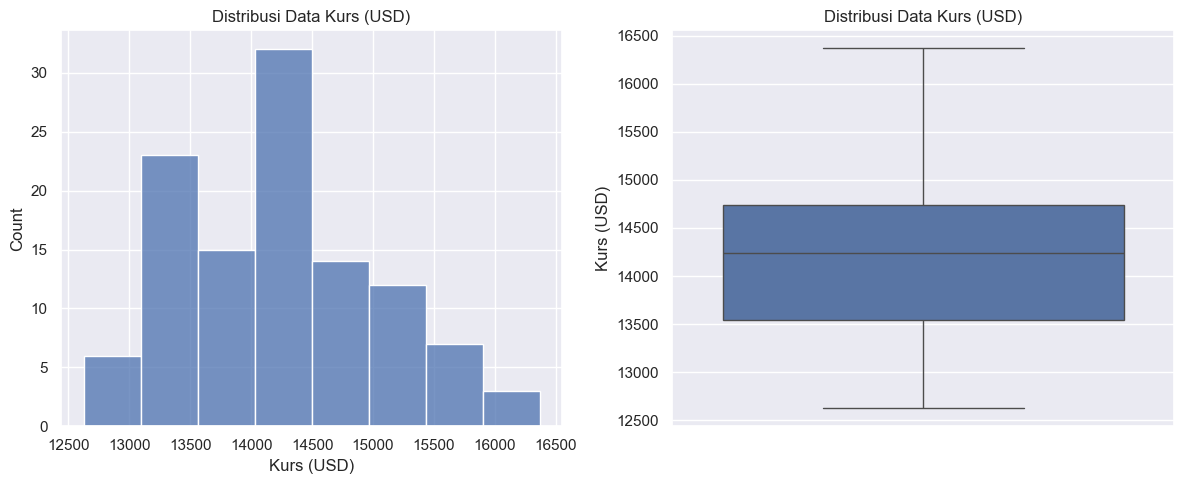

In [182]:
visualize_by("Kurs (USD)")

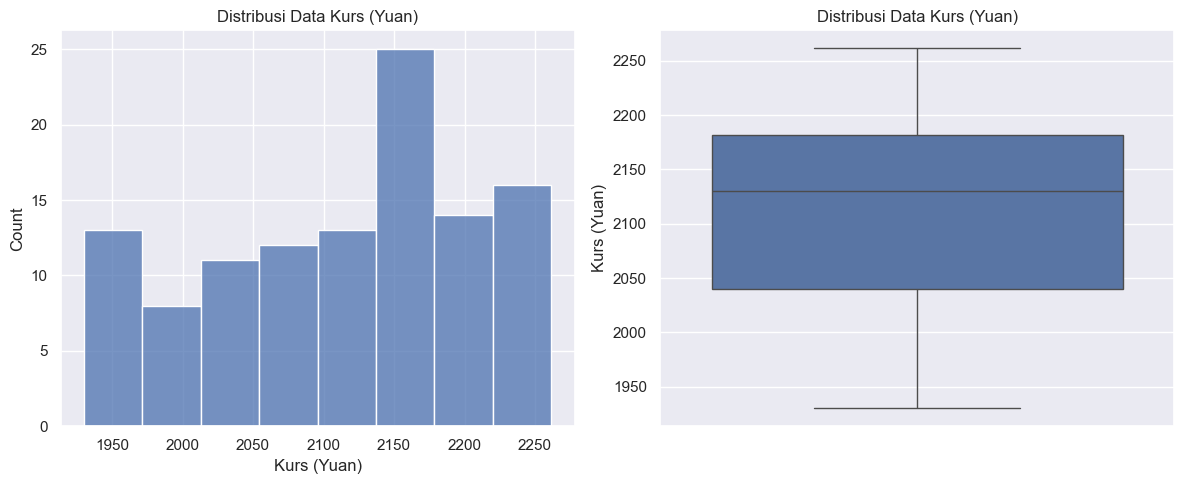

In [183]:
visualize_by("Kurs (Yuan)")

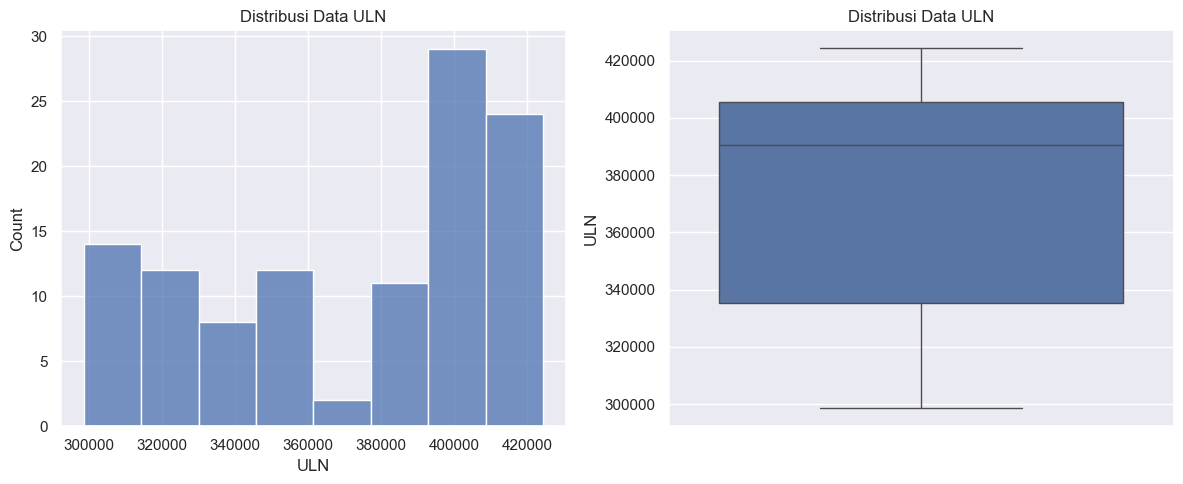

In [184]:
visualize_by("ULN")

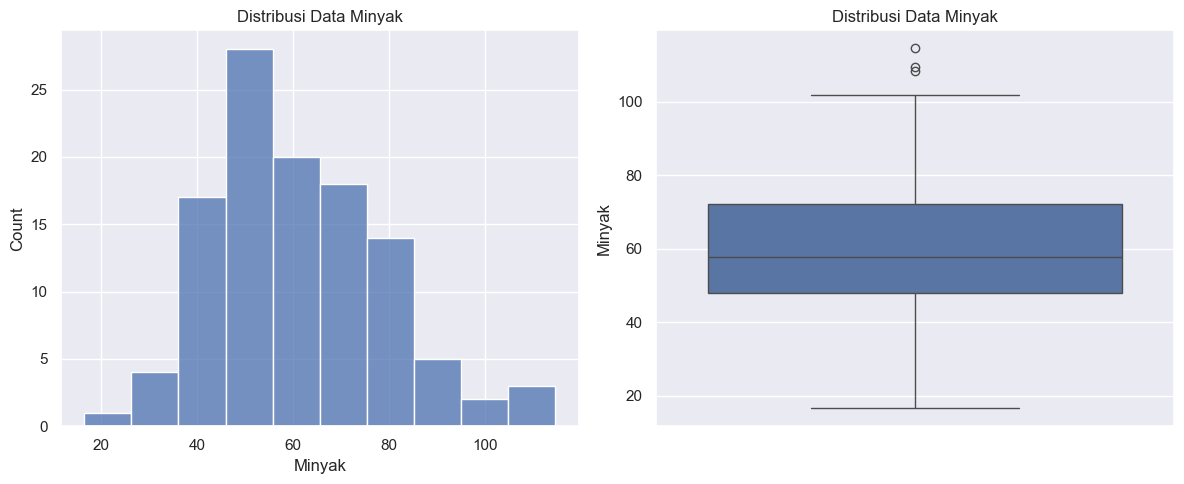

In [185]:
visualize_by("Minyak")

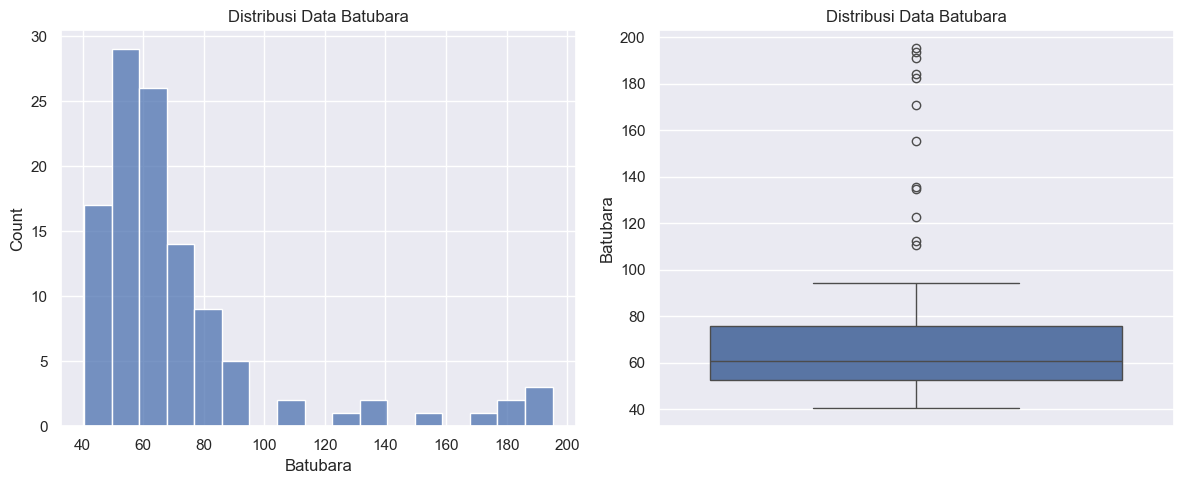

In [186]:
visualize_by("Batubara")

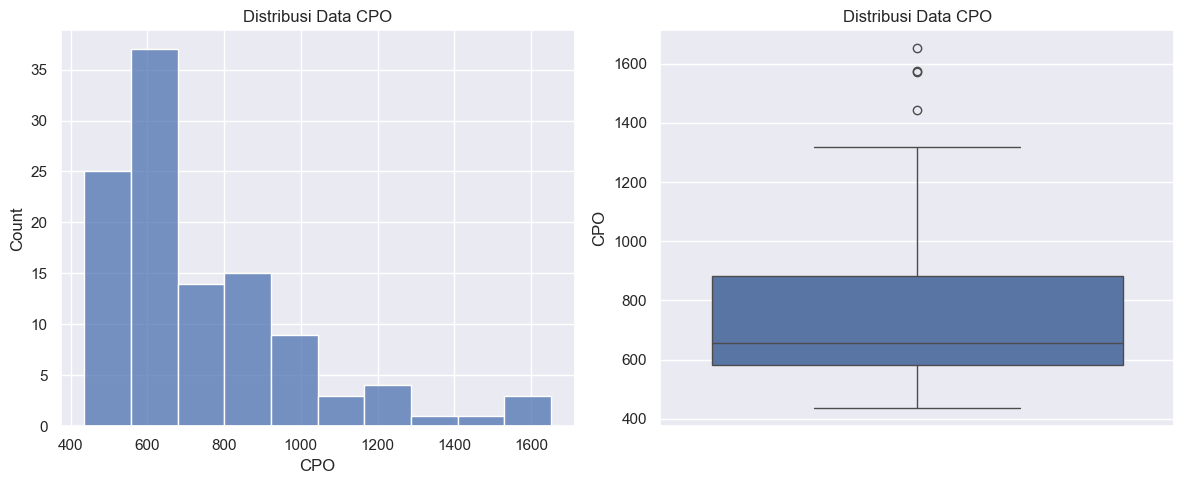

In [187]:
visualize_by("CPO")

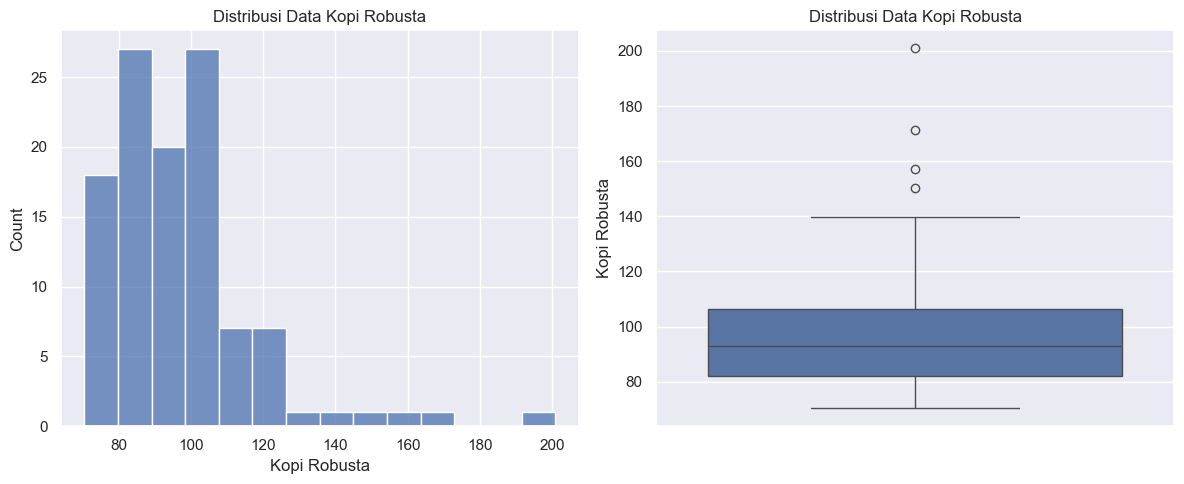

In [188]:
visualize_by("Kopi Robusta")

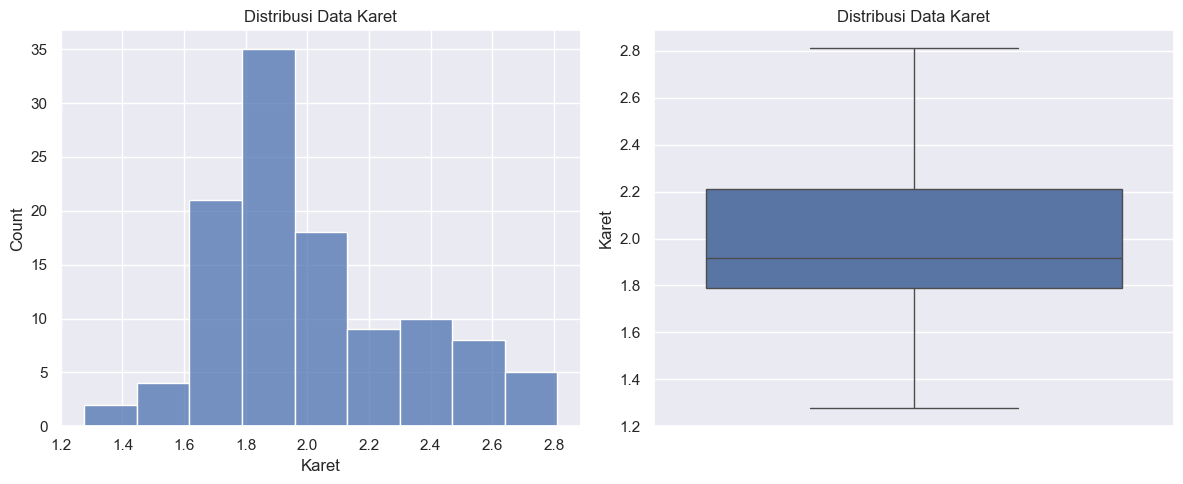

In [189]:
visualize_by("Karet")

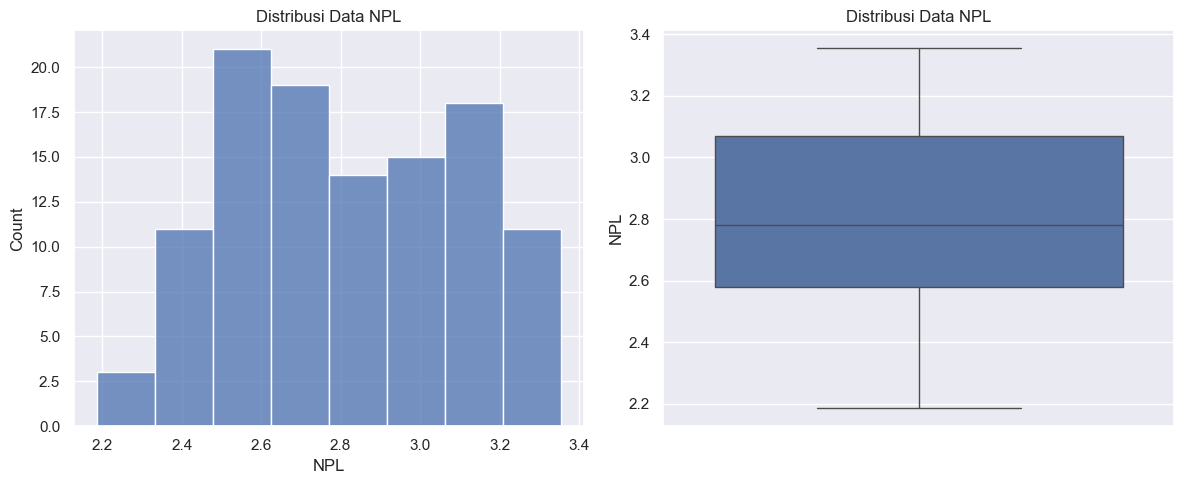

In [190]:
visualize_by("NPL")

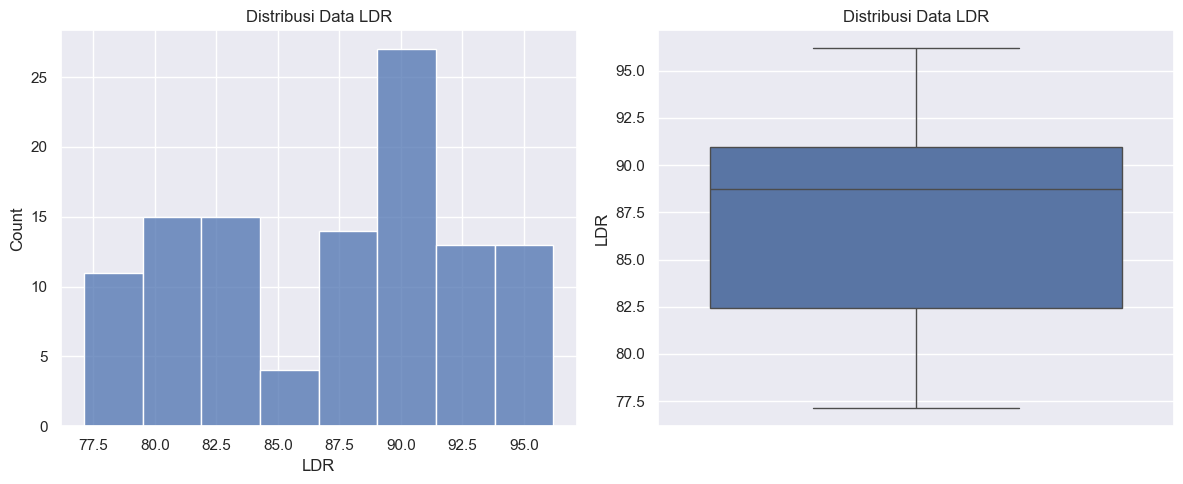

In [191]:
visualize_by("LDR")

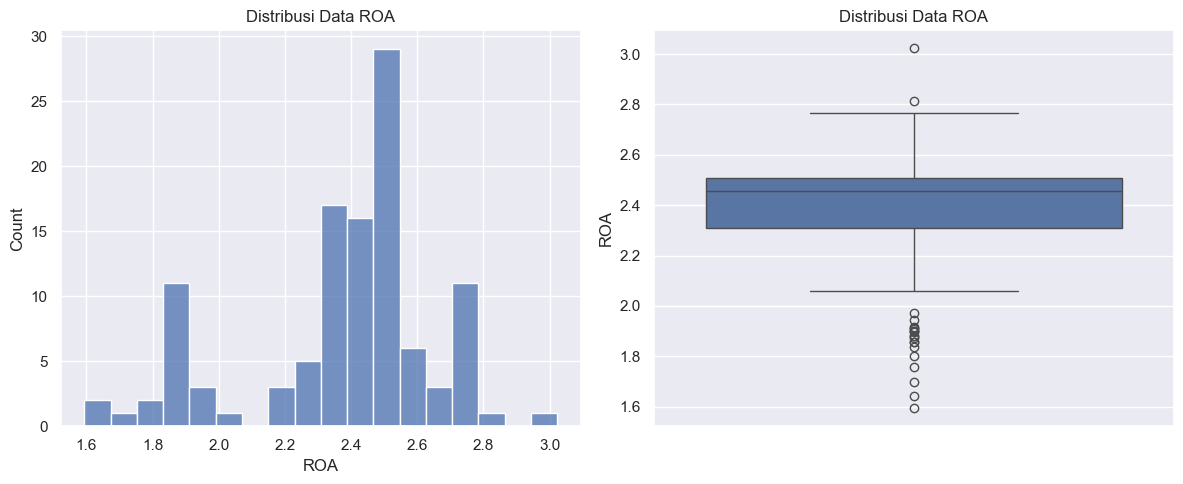

In [192]:
visualize_by("ROA")

## Analisis Data Time Series

In [238]:
def monthly_data(column):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.lineplot(data=df, x='Tanggal', y=column, ax=axs[0])
    axs[0].set_title(f'Perkembangan Data {column}')
    axs[0].set_xlabel("Tanggal")
    axs[0].set_ylabel(column)

    sns.lineplot(data=df, x='Tanggal', y=column, ax=axs[1])
    axs[1].set_title(f'Perkembangan Data {column} Ketika Covid')
    axs[1].set_xlabel("Tanggal")
    axs[1].set_ylabel(column)
    axs[1].axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', label='Covid-19')
    axs[1].legend()  # Tambahkan legenda untuk garis vertikal
    
    fig.tight_layout()
    plt.show()

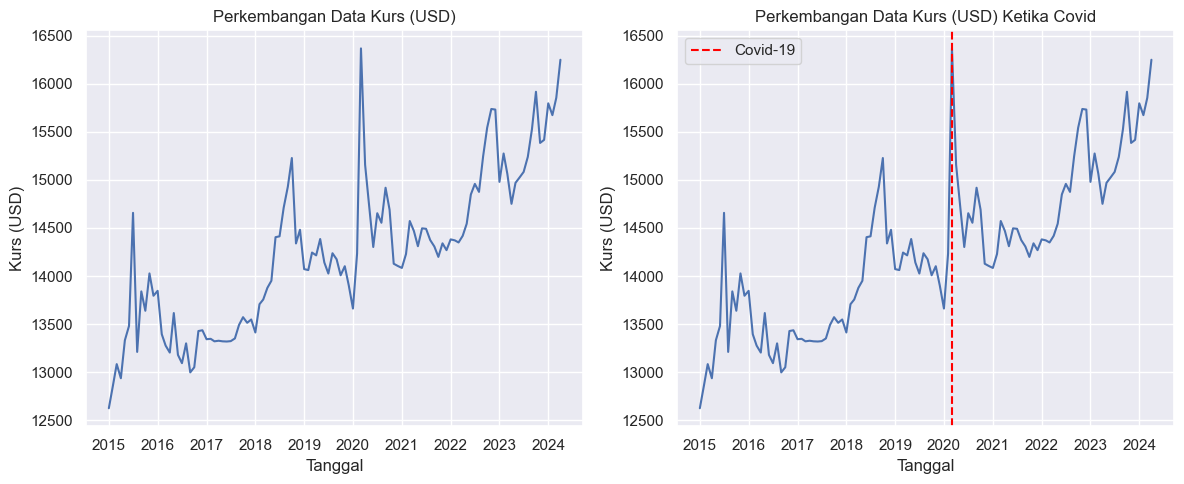

In [240]:
monthly_data("Kurs (USD)")

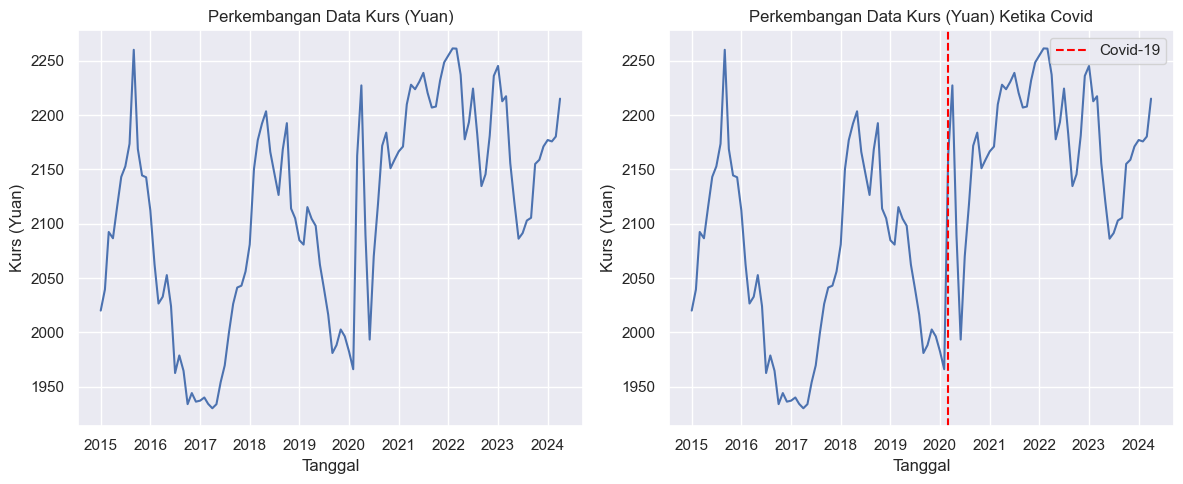

In [244]:
monthly_data("Kurs (Yuan)")

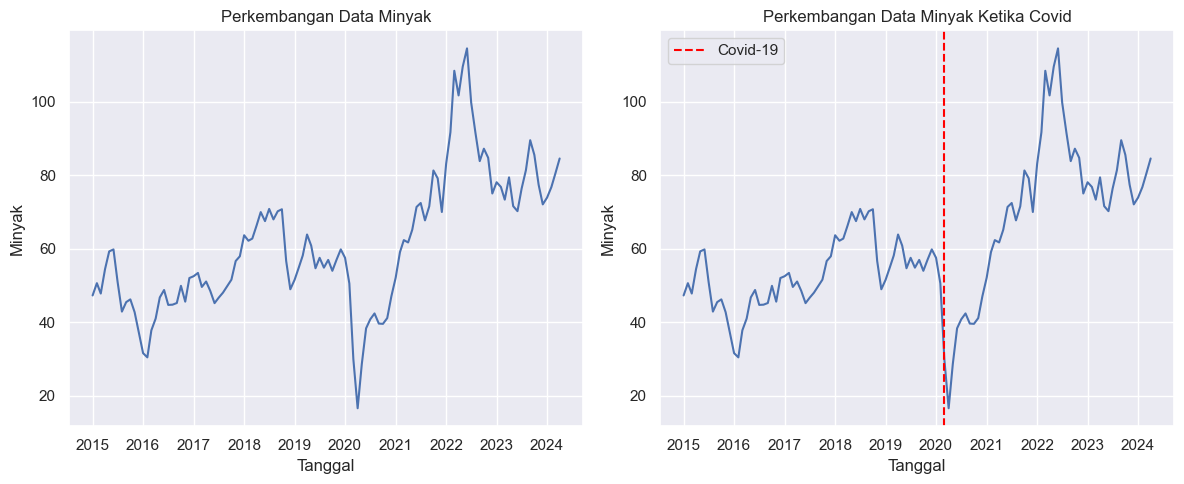

In [246]:
monthly_data("Minyak")

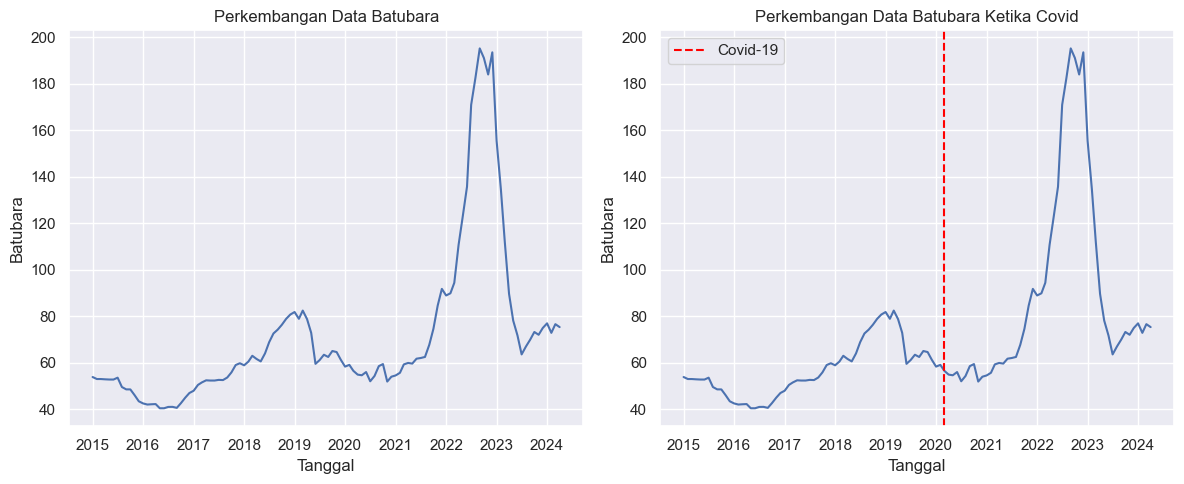

In [248]:
monthly_data("Batubara")

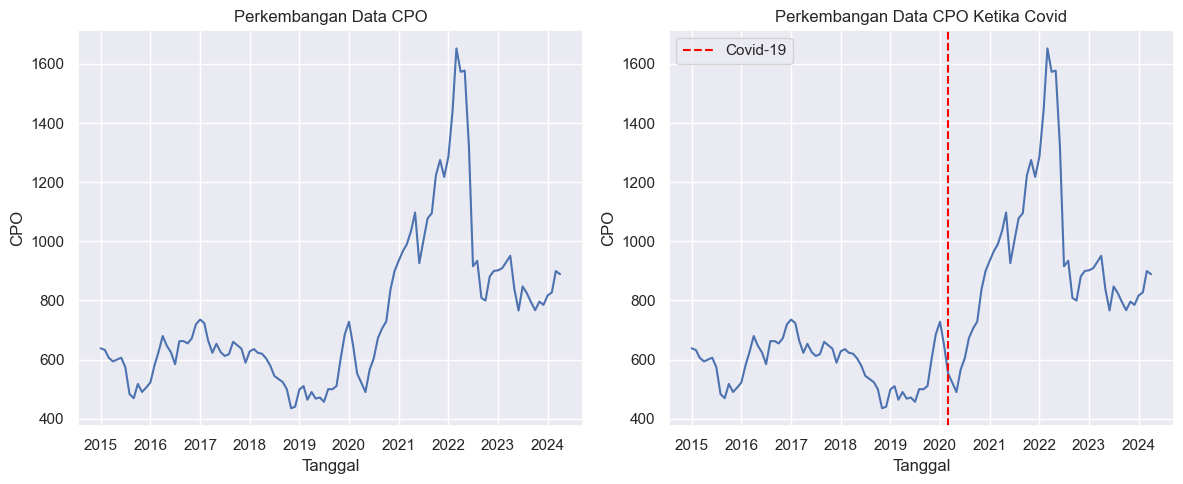

In [250]:
monthly_data("CPO")

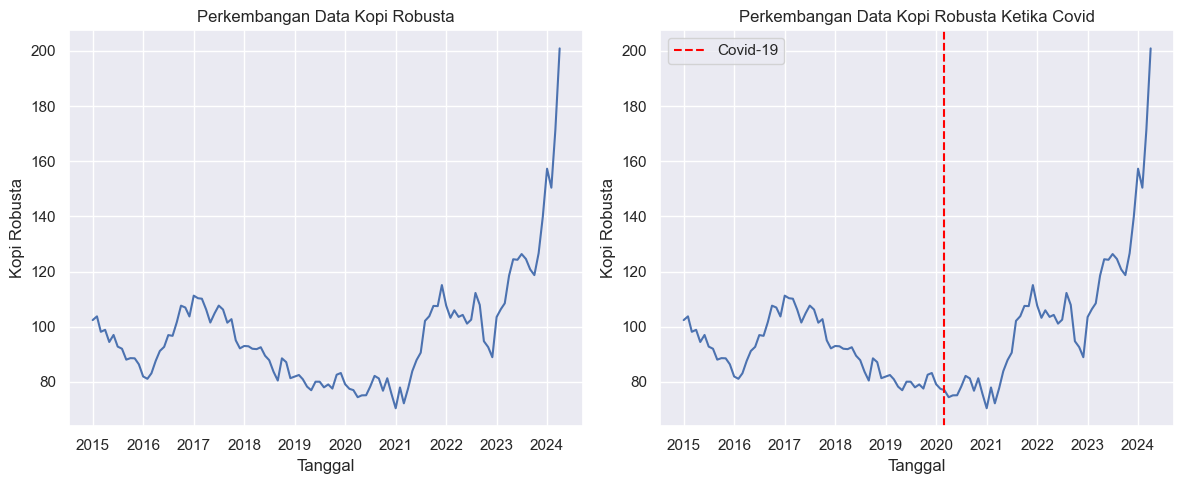

In [252]:
monthly_data("Kopi Robusta")

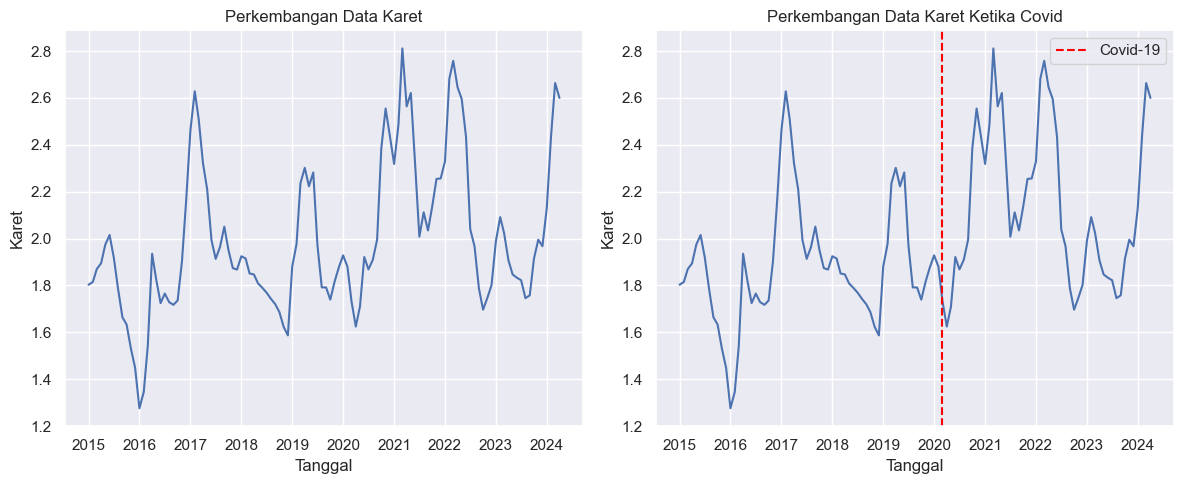

In [254]:
monthly_data("Karet")

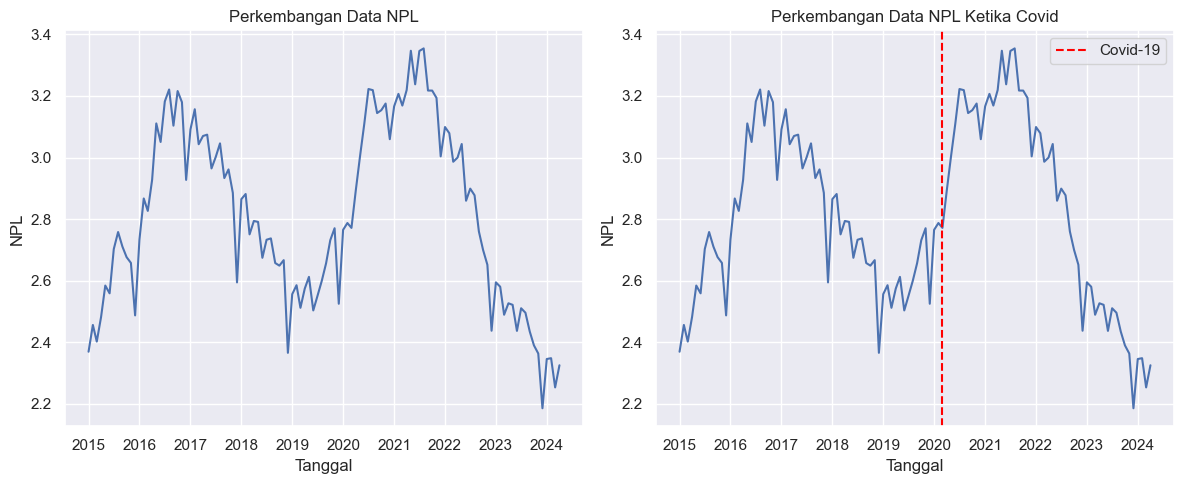

In [256]:
monthly_data("NPL")

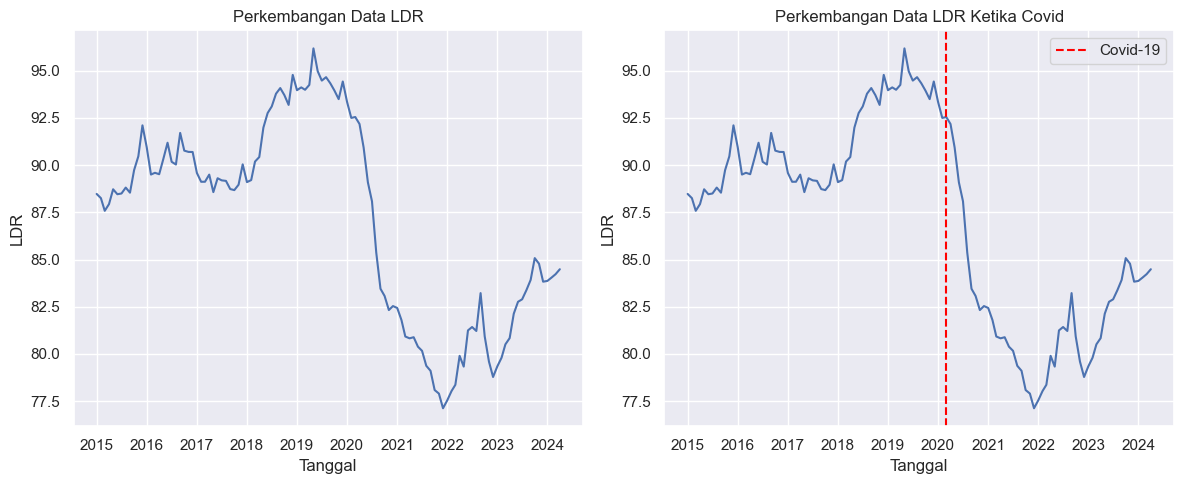

In [258]:
monthly_data("LDR")

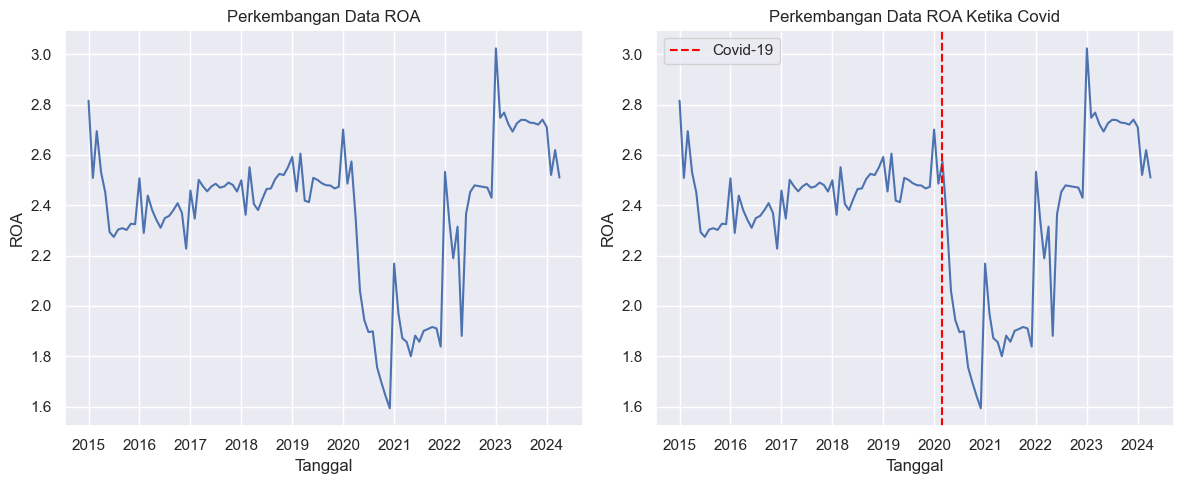

In [260]:
monthly_data("ROA")

## Analisis Korelasi Antar Variabel

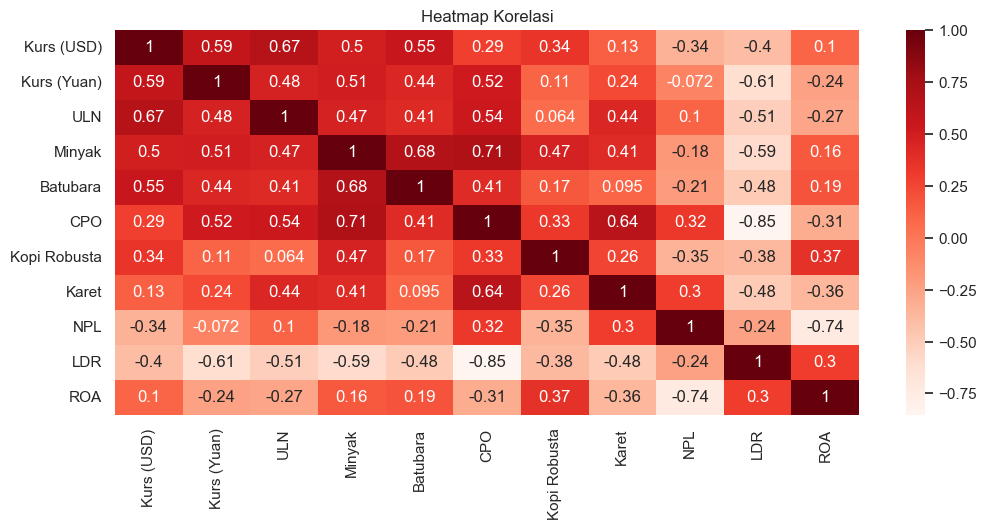

In [143]:
urutan = ['Kurs (USD)', 'Kurs (Yuan)', 'ULN', 'Minyak', 'Batubara', 'CPO', 'Kopi Robusta', 'Karet', 'NPL', 'LDR', 'ROA']
plt.figure(figsize=(12,5))
sns.heatmap(data = df[urutan].corr(), annot=True, cmap='Reds')
plt.title("Heatmap Korelasi")
plt.show()